# Probability Distribution Examples

Docs for the scipy version of these functions is available at:

https://docs.scipy.org/doc/scipy-0.19.1/reference/stats.html


Distributions discussed:
1. Uniform
2. Normal (Gaussian)
3. "Frozen" Normal
4. LogNormal
5. Exponential
6. Fitting Distributions


## Uniform distribution

Two parameters, location and scale.  loc is the minimum of the range, loc+scale is the maximum of the range 


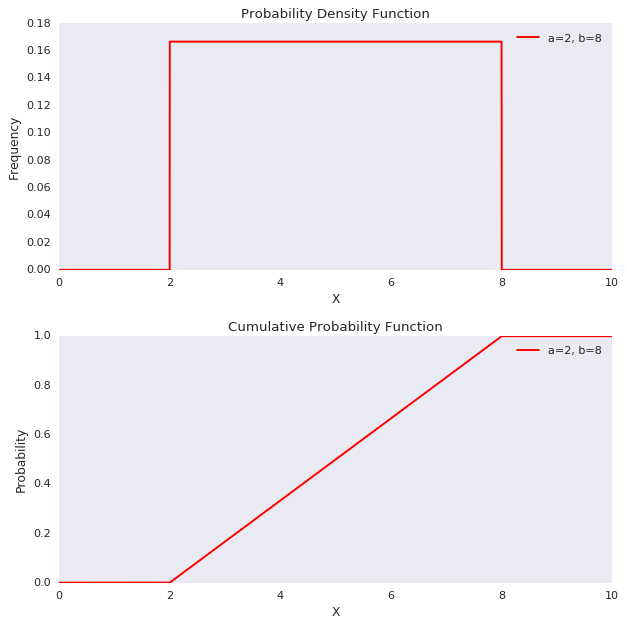

In [50]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# set global plot parameters 
#mpl.rcParams['xtick.labelsize'] = 12
#mpl.rcParams['ytick.labelsize'] = 12
#mpl.rcParams['axes.titlesize'] = 20
#mpl.rcParams['axes.labelsize'] = 16

plt.style.use('seaborn-colorblind')
#', 'dark_background', d', 'seaborn-deep', 'seaborn-colorblind', 'seaborn-bright']

# generate a pdf and cdf for U(2,8)
X = np.arange(0,10,0.001)
Y0 = uniform.pdf(X, loc=2,scale=6)
YC0 = uniform.cdf(X, loc=2,scale=6)

# plot results
plt.figure( figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(X,Y0,color='red', label='a=2, b=8')

plt.xlabel( "X")
plt.ylabel( "Frequency")
plt.title("Probability Density Function")
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(X,YC0,color='red', label='a=2, b=8')
plt.xlabel( "X")
plt.ylabel( "Probability")
plt.title("Cumulative Probability Function")
plt.grid()
plt.legend()

plt.tight_layout()

plt.show()


## Normal (Gussian) distribution

Location parameter: mu, the mean of the data
Scale parameter: std, the standard deviation of the data 

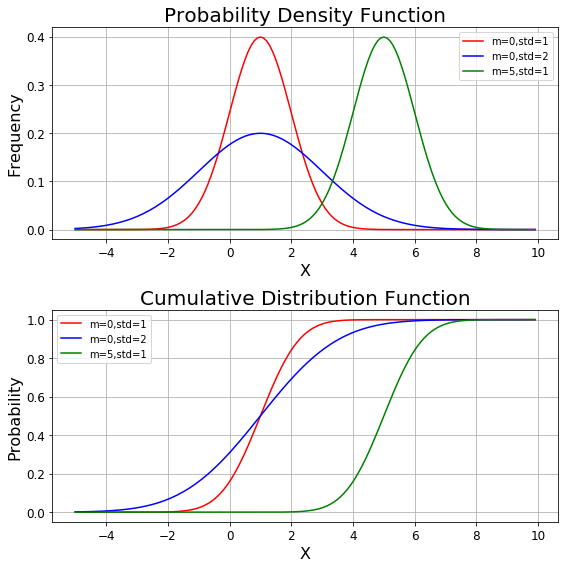

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# generate two normal distributions
mu = 1
std = 1
xmin = -5
xmax = 10
X = np.arange(xmin,xmax,0.1)
Y0 = norm.pdf(X,mu,std)
YC0 = norm.cdf(X,mu,std)

std = 2
Y1 = norm.pdf(X,mu,std)
YC1 = norm.cdf(X,mu,std)

mu = 5
std = 1
Y2 = norm.pdf(X,mu,std)
YC2 = norm.cdf(X,mu,std)

plt.figure( figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(X,Y0,color='red', label='m=0,std=1')
plt.plot(X,Y1, color='blue', label='m=0,std=2')
plt.plot(X,Y2, color='green', label='m=5,std=1')
plt.xlabel( "X")
plt.ylabel( "Frequency")
plt.title("Probability Density Function")
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(X,YC0,color='red', label='m=0,std=1')
plt.plot(X,YC1, color='blue', label='m=0,std=2')
plt.plot(X,YC2, color='green', label='m=5,std=1')
plt.xlabel( "X")
plt.ylabel( "Probability")
plt.title("Cumulative Distribution Function")
plt.grid()
plt.legend()

plt.tight_layout()

plt.show()

## A "Frozen" Normal distribution with a "patch"

A "frozen" distribution is a variable that contains the distribution parameters, so after you create the distribution, you can use it without having to specify the parameters on subsequent calls.

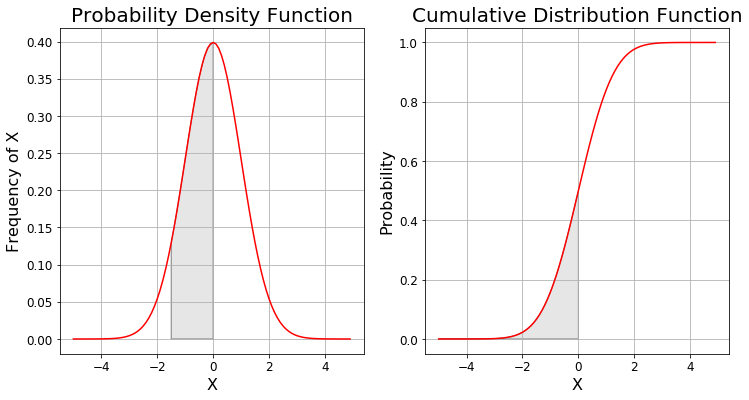

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

mu=0
std = 1

# Make the shaded region
ix = np.linspace(-1.5,0,10)
iy = norm.pdf(ix,mu,std)
verts = [(-1.5, 0)] + list(zip(ix, iy)) + [(0, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')

# generate a "frozen" normal distribution
X = np.arange(-5,5,0.1)
pdNorm = norm(mu,std)
Y = pdNorm.pdf(X)
YC = pdNorm.cdf(X)

plt.figure( figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(X,Y,color='red', label='m=0,std=1')
plt.gca().add_patch(poly)
plt.xlabel( "X")
plt.ylabel( "Frequency of X")
plt.title("Probability Density Function")
plt.grid()

# Make the shaded region
ix = np.linspace(-5.0,0,100)
iy = pdNorm.cdf(ix)
verts = [(-5, 0)] + list(zip(ix, iy)) + [(0, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')

plt.subplot(1,2,2)
plt.plot(X,YC,color='red', label='m=0,std=1')
plt.gca().add_patch(poly)
plt.xlabel( "X")
plt.ylabel( "Probability")
plt.title("Cumulative Distribution Function")
plt.grid()

plt.show()

## Lognormal Distribution

This is a version that implements the lognormal distribution directly (without using scipy) 

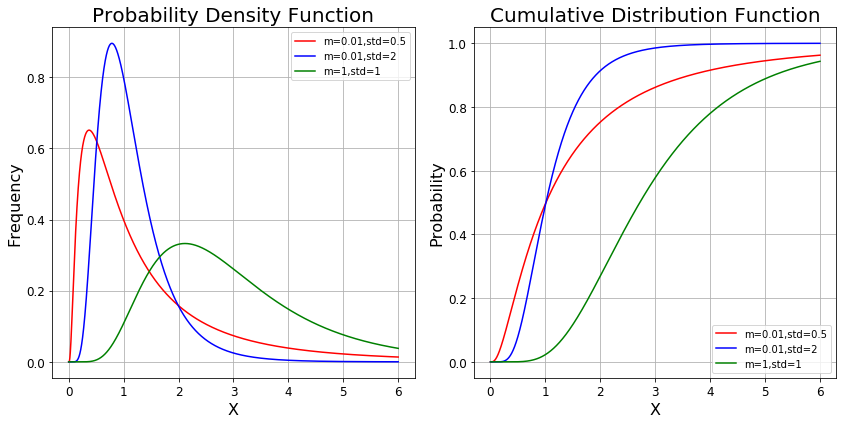

In [13]:

from scipy.integrate import odeint

'''
Note that the parameters for the log-normal are the mean and standard deviation 
of the log of the distribution, not the mean and standard deviation 
of the distribution itself.
'''
# lognormal
mu = 0.01
std = 1

def LogNormal( X, mu, std):
    return (1/(X*std*np.sqrt(2*np.pi)))*np.exp(-(np.power((np.log(X)-mu),2)/(2*std*std)))

def CDF(Y,x):
    pdf = LogNormal(x,mu,std)
    return pdf

xmin = 0.0001
xmax = 6
X = np.arange(xmin,xmax,0.001)

#YP0 = lognorm.pdf(X,std, scale=mu)
#YC0 = lognorm.cdf(X,std, scale=mu)
YP0 = LogNormal(X,mu,std)
YC0 = odeint( CDF, [0], X)

std = 0.5
#YP1 = lognorm.pdf(X,std, scale=mu)
#YC1 = lognorm.cdf(X,std, scale=mu)
YP1 = LogNormal(X,mu, std)
YC1 = odeint( CDF, [0], X)

mu=1;stddev=1
#YP2 = lognorm.pdf(X,std, scale=mu)
#YC2 = lognorm.cdf(X,std, scale=mu)
YP2 = LogNormal(X,mu, std)
YC2 = odeint( CDF, [0], X)

plt.figure( figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(X,YP0,color='red', label='m=0.01,std=0.5')
plt.plot(X,YP1, color='blue', label='m=0.01,std=2')
plt.plot(X,YP2, color='green', label='m=1,std=1')
plt.xlabel( "X")
plt.ylabel( "Frequency")
plt.title("Probability Density Function")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(X,YC0,color='red', label='m=0.01,std=0.5')
plt.plot(X,YC1, color='blue', label='m=0.01,std=2')
plt.plot(X,YC2, color='green', label='m=1,std=1')
plt.xlabel( "X")
plt.ylabel( "Probability")
plt.title("Cumulative Distribution Function")
plt.grid()
plt.legend()

plt.tight_layout()

plt.show()

## Exponential Distribution


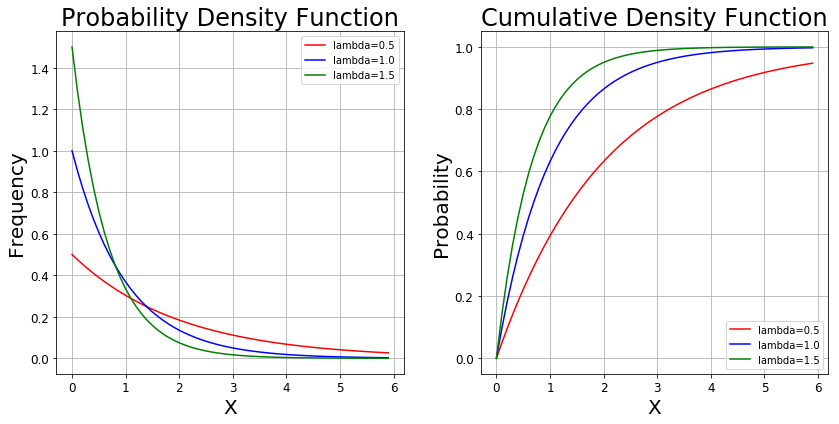

In [16]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

# normal
beta = 0.5
xmin = 0
xmax = 6
X = np.arange(xmin,xmax,0.1)
YP0 = expon.pdf(X,scale=1/beta)
YC0 = expon.cdf(X,scale=1/beta)

beta = 1;
YP1 = expon.pdf(X,scale=1/beta)
YC1 = expon.cdf(X,scale=1/beta)

beta = 1.5;
YP2 = expon.pdf(X,scale=1/beta)
YC2 = expon.cdf(X,scale=1/beta)

plt.figure( figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(X,YP0,color='red', label='lambda=0.5')
plt.plot(X,YP1, color='blue', label='lambda=1.0')
plt.plot(X,YP2, color='green', label='lambda=1.5')
plt.xlabel( "X", fontsize=20)
plt.ylabel( "Frequency", fontsize=20)
plt.title("Probability Density Function", fontsize=24)
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(X,YC0,color='red', label='lambda=0.5')
plt.plot(X,YC1, color='blue', label='lambda=1.0')
plt.plot(X,YC2, color='green', label='lambda=1.5')
plt.xlabel( "X", fontsize=20)
plt.ylabel( "Probability", fontsize=20)
plt.title("Cumulative Density Function", fontsize=24)
plt.grid()
plt.legend()

plt.tight_layout()

plt.show()

## Annual rainfall -  Using a Lognormal distribution

Likelihood of observing at least 1.5 m = 0.50
How much rain can be expected in 4 out of 5 years? 1.93 m
What's the likelihood of receiving more than 3m in a given year? 0.04


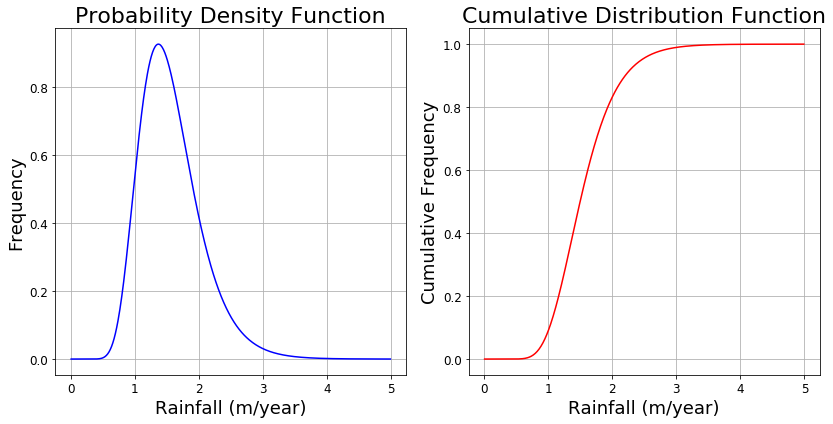

In [19]:
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

# annual rainfall example - assume lognormal
mu = 1.5  # log( m/year )
std =.3
xmin = 0.01
xmax = 5

X = np.arange(xmin,xmax,0.01)
R1 = lognorm.pdf(X,std, scale=mu)     # the second arg is the std dev

# likelihood of seeing at least 1.5m
print( "Likelihood of observing at least 1.5 m = %.2f" % (lognorm.cdf(1.5, std, scale=mu)) )

# how much rain can be expected in 4 out of 5 years?
print( "How much rain can be expected in 4 out of 5 years? %.2f m" % (lognorm.ppf(.8, std, scale=mu)) )

# whats the likelihood of receiving more than 3m in a given year?
print( "What's the likelihood of receiving more than 3m in a given year? %.2f" % (1.0-lognorm.cdf(2.5,std,scale=mu)) )


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(X,R1,color='blue' )
plt.xlabel( "Rainfall (m/year)", fontsize=18)
plt.ylabel( "Frequency", fontsize=18)
plt.title( "Probability Density Function", fontsize=22)
plt.grid()

plt.subplot(1,2,2)
plt.plot(X,lognorm.cdf(X,std,scale=mu),color='red')
plt.xlabel( "Rainfall (m/year)", fontsize=18)
plt.ylabel( "Cumulative Frequency", fontsize=18)
plt.title( "Cumulative Distribution Function", fontsize=22)
plt.grid()

plt.tight_layout()
plt.show()

## An Exponential Distribution

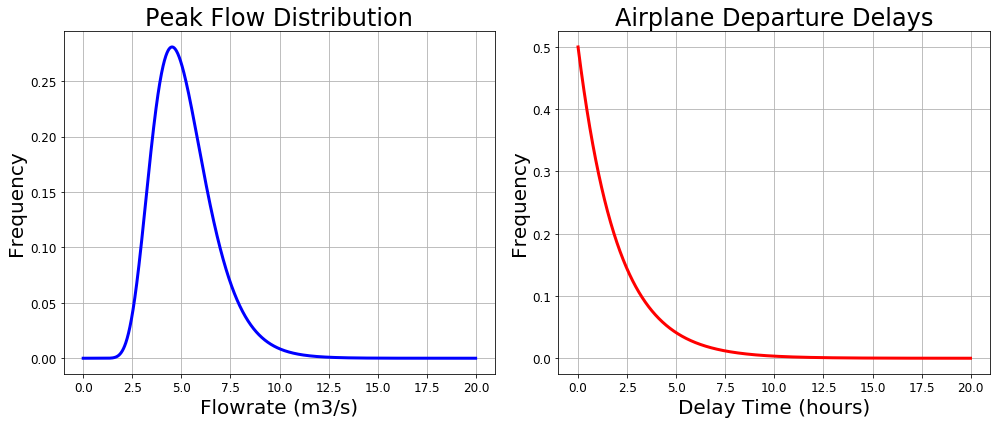

In [20]:
from scipy.stats import lognorm
xmin = 0.0001
xmax = 20
X = np.arange(xmin,xmax,0.01)

mu=1.6;stddev=2
#YP2 = lognorm.pdf(X,std, scale=mu)
#YC2 = lognorm.cdf(X,std, scale=mu)
Y0 = LogNormal(X,mu, std)

beta = 2;
Y1 = expon.pdf(X,scale=beta)

plt.figure( figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(X,Y0,color='blue', linewidth=3)
plt.xlabel( "Flowrate (m3/s)", fontsize='20')
plt.ylabel( "Frequency", fontsize='20')
plt.title("Peak Flow Distribution", fontsize='24')
plt.grid()

plt.subplot(1,2,2)
plt.plot(X,Y1,color='red', linewidth=3)
plt.xlabel( "Delay Time (hours)", fontsize='20')
plt.ylabel( "Frequency", fontsize='20')
plt.title("Airplane Departure Delays", fontsize='24')
plt.grid()

plt.tight_layout()
plt.show()

## Fitting a Lognormal distibution to a dataset - Peak Flows in the Willamette

This example uses USGS gauge data capturing peak annual flows from  1861-2015.

fit(): shape=0.47,  loc=781.2,  scale=138176.9


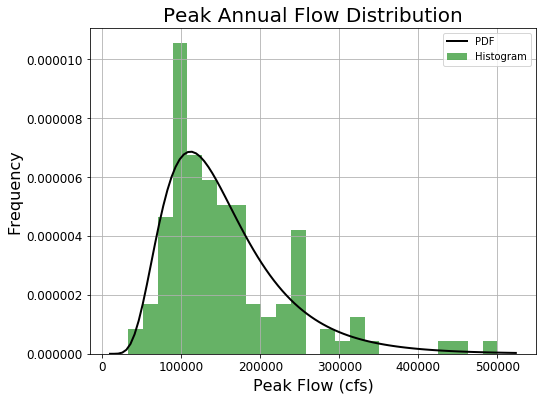

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import lognorm
import matplotlib.pyplot as plt

# open the file
dataset = pd.read_csv( "http://explorer.bee.oregonstate.edu/topic/Modeling/data/PeakFlowsWillametteAtSalem.txt",
                        sep='\t', skiprows=50)

discharges = dataset['peak_va']

# fit a lognormal distribution
shape, loc, scale = lognorm.fit(discharges, 0, loc=0, scale=0 )
print( "fit(): shape=%.2f,  loc=%.1f,  scale=%.1f" % ( shape,loc,scale ) )

# Plot the histogram.
plt.figure(figsize=(8,6))
plt.hist(discharges, bins=25, normed=True, alpha=0.6, color='g', label='Histogram')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, p, 'k', linewidth=2, label='PDF')

title = "Fit results: shape=%.2f,  loc=%.2f,  scale=%.2f" % (shape, loc, scale)
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Frequency')
plt.title('Peak Annual Flow Distribution')
plt.legend()
plt.grid()
plt.show()

## Fit a Normal Distribution to a Dataset - Water Year Evaptranspiration Totals for Corvallis

This dataset has water year totals of crop evapotranpiration (ET) for the Corvallis area from 1991-2015.  We generate the ET Ratio, defined as the actual ET fpr a given crop (field corn, in this case) divided by the "reference ET", the ET for a "standardized" crop, in this case alfalfa.

['Year' 'ET0' 'Pasture' 'Lawn' 'GrassSeed' 'Blueberries' 'Winter Grain'
 'Spring Grain' 'Trailing Berries' 'Potatoes' 'Dry Beans' 'Field Corn'
 'Sweet Corn' 'Wine Grapes' 'Apples' 'Cabbage' 'Broccoli' 'Strawberries'
 'Pears' 'Peppermint' 'Unnamed: 20' 'Unnamed: 21']
fit(): mean=0.670,  stddev=0.016


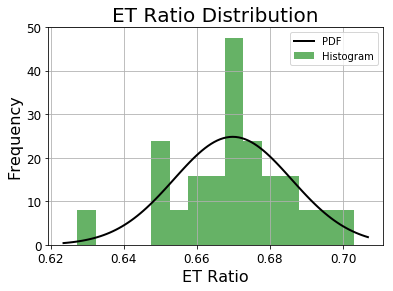

In [24]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# open the file
dataset = pd.read_csv( "http://explorer.bee.oregonstate.edu/topic/Modeling/data/WaterYearETDataCRVO.csv")
print(dataset.columns.values)

# exttract needed data
ETref = dataset['ET0']
ETfcorn = dataset['Field Corn']

# compyute the ET ration
ETratio = ETfcorn/ETref 

# some simple stats
mean, stddev = norm.fit(ETratio)
print( "fit(): mean=%.3f,  stddev=%.3f" % ( mean, stddev ) )

# Plot the histogram.
plt.hist(ETratio, bins=15, normed=True, alpha=0.6, color='g', label="Histogram")

# Plot the PDF.
# note: The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x,loc=mean,scale=stddev)

plt.plot(x, p, 'k', linewidth=2, label='PDF')
plt.xlabel('ET Ratio')
plt.ylabel('Frequency')
plt.title('ET Ratio Distribution')
plt.legend()
plt.grid()
plt.show()


## Fit an Exponential Distribution to a Dataset - Mosquito prevalence in traps

This dataset was collected as part of an effort to control West Nile Virus transmission in the Chicago area.  It collected counts of mosquitos caught in traps that were distributed thoughout the city.

['Date' 'Address' 'Species' 'Block' 'Street' 'Trap'
 'AddressNumberAndStreet' 'Latitude' 'Longitude' 'AddressAccuracy'
 'NumMosquitos' 'WnvPresent']
fit(): loc=1.000,  scale=7.864


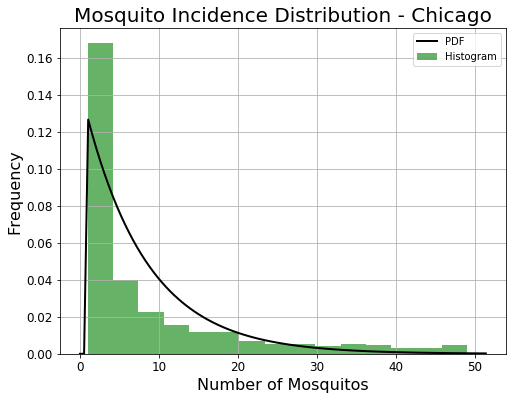

In [31]:
import numpy as np
import pandas as pd
from scipy.stats import expon
import matplotlib.pyplot as plt

# open the file
dataset = pd.read_csv( "http://explorer.bee.oregonstate.edu/topic/Modeling/data/MosquitoTrap.csv")
print(dataset.columns.values)

# extract data
Y = dataset['NumMosquitos']

# fit an exponential distribution
loc,scale = expon.fit(Y)
print( "fit(): loc=%.3f,  scale=%.3f" % ( loc, scale ) )

plt.figure( figsize=(8,6))

# Plot the histogram.
plt.hist(Y, bins=15, normed=True, alpha=0.6, color='g', label="Histogram")

xmin, xmax = plt.xlim()
x = np.linspace(0, xmax, 100)
p = expon.pdf(x,loc=loc,scale=scale)
plt.plot(x, p, 'k', linewidth=2, label='PDF')

plt.xlabel('Number of Mosquitos')
plt.ylabel('Frequency')
plt.title( 'Mosquito Incidence Distribution - Chicago')
plt.legend()
plt.grid()
plt.show()